In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Plot settings
%matplotlib inline
plt.style.use('seaborn-dark-palette')
plt.interactive(True)
plt.rcParams['figure.figsize'] = (20, 8)

In [58]:
df = pd.read_csv('../data/2018-02-10-2019-02-10-India-Indonesia-Thailand.csv')

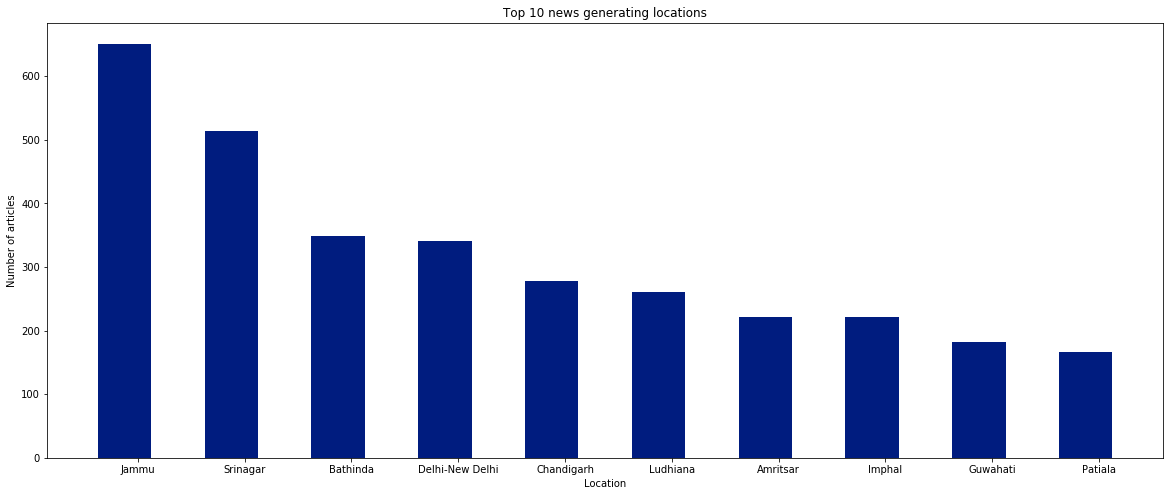

In [63]:
counter = Counter(df.location)
counter = sorted(counter.items(), key=lambda x: x[1], reverse=True)[:10]
counter = np.array(counter)

places, counts = counter[:, 0].tolist(), counter[:, 1].astype(np.float32)
indices = np.arange(len(counts))
width = 1

plt.xlabel("Location")
plt.ylabel("Number of articles")
plt.interactive(True)

plt.xticks(indices + 0.125, places)
plt.title("Top 10 news generating locations")
_ = plt.bar(indices, counts, 0.5)

In [42]:
df = df[df['location'] == "Chennai"]
df['event_date'] = pd.to_datetime(df['event_date'])
df.sort_values(by=['event_date'], inplace=True)

In [43]:
dates = pd.date_range(start=df.iloc[0]['event_date'], end=df.iloc[-1]['event_date'])
num_events = np.zeros(len(dates))

i = 0
for date in dates:
    num_events[i] += len(df[df['event_date'] == date])
    i += 1

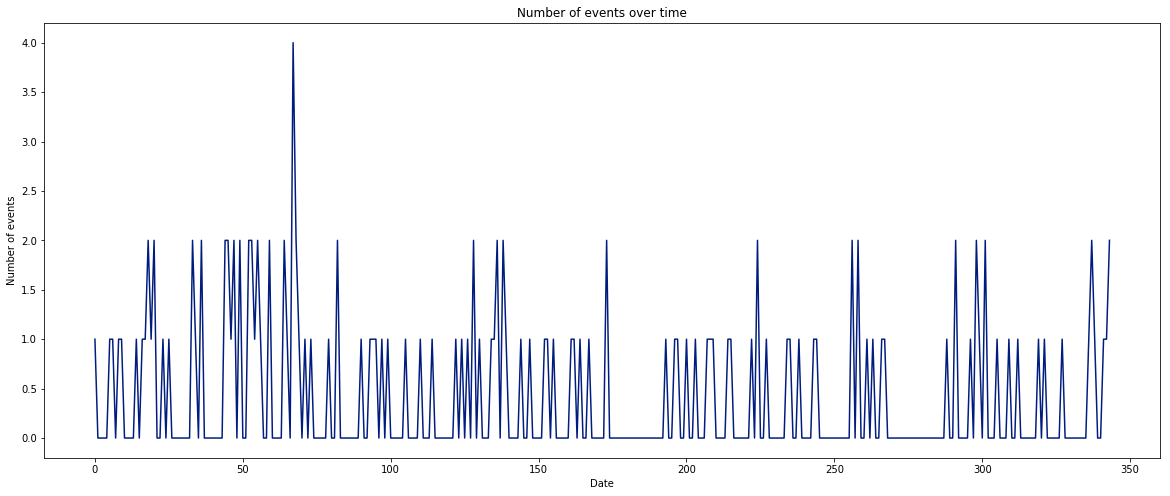

In [44]:
plt.title("Number of events over time")
plt.xlabel("Date")
plt.ylabel("Number of events")
_ = plt.plot(num_events)

In [45]:
news_articles = df.notes

In [34]:
def get_glove_dict():
    """
    Inputs - None
    
    Returns - Dict below
    
    Create a dict with word as key and word vector as value
    """
    d = {}
    f = open("../glove_vectors/glove.6B.100d.txt", 'r')
    for row in f:
        row = row.replace('\n', '').split(" ")
        word = row[0]
        vector = np.array([float(x) for x in row[1:]])
        d[word] = vector
    f.close()
    return d

def generate_labels(num_events, num_days=2):
    """
    Inputs - 
        num_events - as generated as above 
        num_days - the number of days to look ahead
    
    Returns - Returns labels generated as below
    
    Generate labels by using the future events, basically
    look-ahead to create labels. If an event occurs from 
    i to i + num_days, then label is 1.0 else 0.0
    """
    n = len(num_events)
    labels = np.zeros(n - num_days)
    for i in range(n - num_days):
        labels[i] = 1.0 if sum(num_events[i: i + num_days] > 0) else 0.0
    return labels
    

In [30]:
vector = get_glove_dict()

In [46]:
labels = generate_labels(num_events)

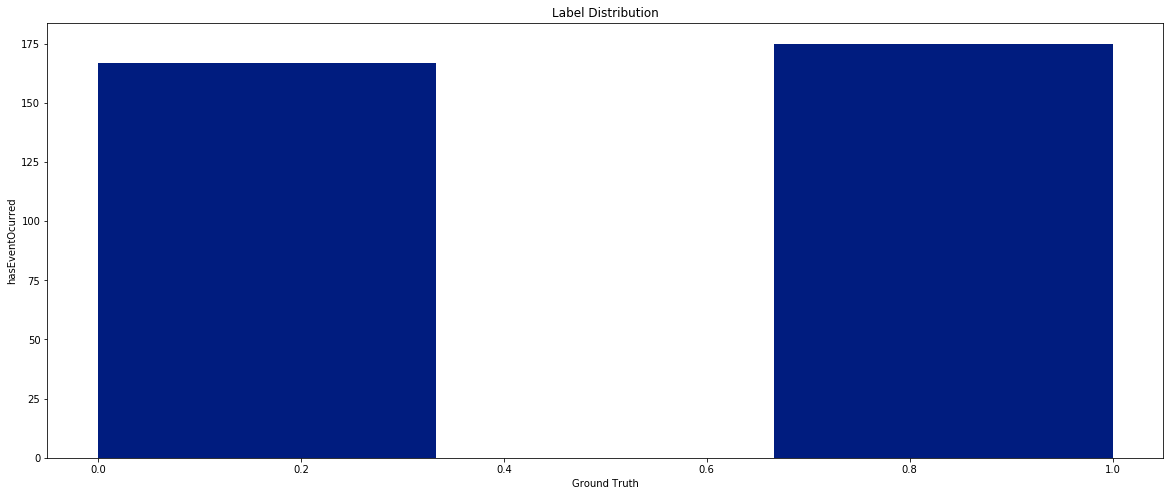

In [62]:
plt.title('Label Distribution')
plt.xlabel('Ground Truth')
plt.ylabel('hasEventOcurred')
_ = plt.hist(labels, bins=3, range=(0, 1))

In [ ]:
# TODO - Arrange news articles for word2vec
# TODO - Run prelim model